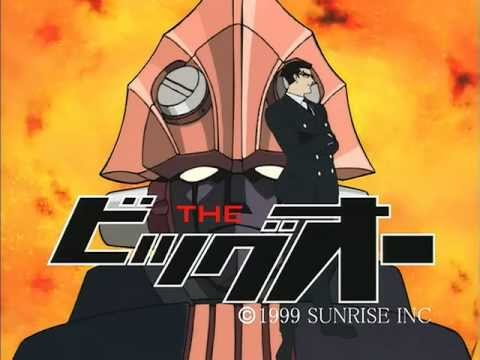

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('s7_Od9CmTu0')

# Running Time Analysis
## Big O Notation

When comparing two algorithms we need to measure their **relative rates of growth** in order of time. To measure the running time of an algorithm we use a notation called **Big O Notation**. 

The following table represents the typical growth rates of algorithms in ascending order 

| Function | Name |
| -------- | ---- |
| c | Constant |
| logN | Logarithmic | 
| $log^2N$ | Log - Squared |
| N | Linear | 
| NlogN | N log N |
| $N^2$ | Quadratic |
| $N^3$ | Cubic |
| $2^n$ | Exponential |


### General Rules
*Rule 1 - For Loops*
The running time for a generic **for** loop is O(N).  

*Rule 2 - Nested For Loops*
Analyze these inside out. The total running time of a statement inside a group of nested loops is the running time of the statement multiplied by the product of the sizes of all the loops

*Rule 3 - Consecutive Statements*
You just add the statements together

*Rule 4 - If/Else Statements*
For these statements the running time is never more than the running time of condition plus the larger of the running times of S1 and S2<br>
if(condition) <br>
&emsp;S1 <br>
else <br>
&emsp;S2
    
### Some Examples

In [5]:
# Rule 1
# This is only O(N) since we are iterating over one foor loop
x = 0
for i in range(10): 
    x += i ** 2
    

# Rule 2
# This is O(N^2) since we are iterating over two loops so we would have O(N*N) = O(N^2)
x = 1
for i in range(10):      # O(N*N) = O(N^2)
    for j in range(11):  # O(N)
        x += 1

# Rule 3
# This is O(N^2) as well. The overall running time O(N^2) + O(N) but the running rime is equivalent to the largest of them
x = list(range(10))
for i in range(len(x)):       #O(N)
    x[i] = 0
for i in range(len(x)):       #O(N*N) = O(N^2)
    for j in range(len(x)):   #O(N)
        x[i] += x[j] + i + j  
        
# Rule 4
# Lets look back at the factorial recursive function
# The running time is O(N). This is because the recursive call will only be called N times therefore being O(N)
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
    


Now lets take a special look at the fibanacci sequence 
```python
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```
The running time for this would be O(1) for the base case but the recursive case is T(n-1) + T(n-2). <br>
Giving us an overall running time T(n) = T(n-1) + T(n-2) + O(1) <br>
T(n) = T(n-1) + T(n-2) < T(n-1) + T(n-1). <br>
*We can use inequalities like this since we are only worried about the upper bound running time of the algorithm in Big O.* <br>
$T(n) = 2*T(n-1)$ <br>
$T(n) = 2*(T(n-2) + T(n-3)) < 2*2*T(n-2)$ <br>
And we will perform this all the way until we get to the base case so we eventually get to this <br>
$T(n) = O(2^n)$

## Maximum SubSequence Sum Problem
Given (possibly negative) integers $A_1,A_2,....,A_n$ find the maximum value of $\sum_{k=i}^j A_k$ <br>
*For convienance if all the numbers are negative then the max sub sequence is 0* <br>
So lets look at a few solutions to this problem and compare their run times <br>

### Brute Force
First Attempt is to use a brute force algorithm and try every possible combination of numbers <br>
```python
def max_sub_sum_brute(a):
    maxSum = 0
    for i in range(len(a)):
        subSum = 0
        for j in range(i, len(a)):
            subSum += a[j]
            if subSum > maxSum:
                maxSum = subSum
                
    return maxSum
```
While this algorithm does work it is incredibly inefficient as the running time is $O(N^2)$.

### Divide and Conquer
Now let's look at the **Divide and Conquer** algorithm for this. In this algorithm we consider the maximum sub sum occurs in one of three parts: the left half, the right half, or right in the center. So we will have the algorithm split the problem into three different subproblems where one recursive call calculates the maximum sub sum of the right, and the other calculates the maximum sub sum of the left, then we will calculate the maximum sub sum of the middle. 

```python
def max_sub_sum_dc(a):
    if len(a) == 1:
        if a[0] > 0:
            return a[0]
        else:
            return 0
        
    center = len(a)/2
    
    # calculate max sum sub of the left half
    maxSumLeft = max_sub_sum_dc(a[:center])
    
    # calculate max sum sub of the right half
    maxSumRight = max_sub_sum_dc(a[center:])
    
    # calculate center sub sum
    maxLeftCenter, leftSubSum = 0,0
    for i in range(center-1, -1, -1):
        leftSubSum += a[i]
        if leftSubSum > maxLeftCenter:
            maxLeftCenter = leftSubSum
    
    maxRightCenter, RightSubSum = 0,0
    for i in range(center, len(a)):
        rightSubSum += a[i]
        if rightSubSum > maxRightCenter:
            maxRightCenter = rightSubSum
    
    return max([maxSumLeft, maxSumRight, maxRightCenter + maxLeftCenter]) 
```

Now let's compute the running time of our divide and conquer solution. It would be the run time of the two recursive calls plus the two for loops to calculate the sub sum of the center <br>
$T(n) = 2*T(n/2) + n$ <br>
*Now the two recursive calls are T(n/2) since we are dividing the list in half each time* <br>
Now let's solve the recurrence relation by looking at a few more iterations. <br>
$T(n) = 2*(2*T(n/4) + n/2) + n$ <br>
$T(n) = 4*(2*T(n/8) + n/4) + 2n$ <br>
... <br>
$T(n) = 2^kT(n/2^k) + kn$ <br>
Now we make the assumption that $T(n/2^k) = T(1)$ as it has hit the base case. <br>
So now we can perform some algebra that $n/2^k = 1$ hence $n = 2^k$ and using out log rules $k = log(n)$ <br>
So lets perform some substitution $T(n) = 2^kT(1) + kn = n*1 + kn = n*1 + n*log(n)$ <br>
Hence the algorithm runs in **O(nlogn)**


### Linear
Lets look at a version that runs in linear time *O(N)*
```python
def max_sub_sum(a):
    maxSum = 0
    subSum = 0
    for i in range(len(a)):
        subSum += a[i]
        if subSum > maxSum:
            maxSum = subSum
        elif subSum < 0:
            subSum = 0
            
    return maxSum
```

Here we only make one pass through the list keeping track of the maximum subSequence as we go. It is obvious to see this algorithm runs in O(N) time but not obvious to see it's correctness that it works. So let's see with an example: <br>
3,5,-4,6,-10,3 <br>
iter 0: subSum = 3, maxSum = 3 <br>
iter 1: subSum = 3+5=8, maxSum = 8 <br>
iter 2: subSum = 3+5-4=4, maxSum = 8 <br>
iter 3: subSum = 3+5-4+6=10, maxSum = 10 <br>
iter 4: subSum = 3+5-4+6-10=0, maxSum = 10 <br>
iter 5: subSum = 3=3, maxSum = 10 <br>
As we can see it calculates correct that the maximum sub sum which consist of the sublist 3,5,-4,6. 

## Logarithms 
As we have seen divide and conquer algorithms will run in O(NlogN). Besides divide and conquer algorithms, the most frequent appearance of logarithms appears around the following general rule: 

An algorithm is O(logN) if it takes constant *(O(1))* time to cut the problem size by a fraction. On the other hand, if constant time is merely required to reduce the problem by a constant amount (such as making it smaller by 1) then the algorithm is O(N)

Lets look at a few examples:

### Binary Search 
Given an integer X and a sorted list of integers find the index of integer X

```python
def bin_search(l, x):
    low, high = 0, len(l)-1
    
    while low <= high:
        mid = (low + high)/2
        if a[mid] < x:
            low = mid + 1
        elif a[mid] > x:
            high = mid - 1
        else:
            return mid
        
    return -1 # x is not in the list
```

Now to figure out the running time of this algorithm we would need to solve the recurrence relation T(n) = T(n/2) + 1 <br>
We already did this similarly with our divide and conquer algorithm. So we would have T(n) = 1 + k where k = logN. <br>
So the running time of binary search is O(logN)


### Exponentiation

Lets take a look at the running time of the power function we wrote in the last class

```python
def pow(x, n):
    if (n == 0):
        return 1
    if (n == 1):
        return x
    elif n % 2 == 0:
        return pow(x, n/2)**2
    else:
        return (pow(x, (n-1)/2)**2)*x
```

The running time of this algorithm would also be O(logN) as we are diving the number by a fraction each time. 